# Заливка данных

In [306]:
import pandas as pd
import numpy as np

Ссылка на файл https://drive.google.com/file/d/1GSI9RCvlxT9mYOLHkrokcsK1PpLwkE3h/view?usp=sharing

In [307]:
!gdown 1GSI9RCvlxT9mYOLHkrokcsK1PpLwkE3h

Downloading...
From: https://drive.google.com/uc?id=1GSI9RCvlxT9mYOLHkrokcsK1PpLwkE3h
To: /content/german-credit.csv
100% 50.5k/50.5k [00:00<00:00, 85.2MB/s]


In [308]:
df = pd.read_csv('/content/german-credit.csv')

In [309]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,1


# Предобработка

## Удаление столбца

In [310]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [311]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


## Переименование столбцов

In [312]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'default'],
      dtype='object')

In [313]:
df.columns = ['age', 'sex', 'job', 'housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'default']

In [314]:
df.columns = df.columns.str.replace(' ','_').str.lower()

## Пропуски

In [315]:
df.isna().mean()

,0
age,0.000
sex,0.000
job,0.000
housing,0.000
saving_accounts,0.183
checking_account,0.394
credit_amount,0.000
duration,0.000
purpose,0.000
default,0.000


# Сводная таблица

## Группировка

In [316]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [317]:
len(df)

1000

In [318]:
df['checking_account'] = df['checking_account'].fillna('no_info')

In [319]:
(df.groupby(['checking_account','sex'])
[['default','credit_amount']]
 .agg({'default':['count','mean'],
       'credit_amount':['mean','median']}))

default           credit_amount        
                          count      mean          mean  median
checking_account sex                                           
little           female      88  0.522727   2564.215909  1838.5
                 male       186  0.478495   3464.295699  2589.5
moderate         female      86  0.476744   3720.034884  2651.0
                 male       183  0.349727   3878.092896  2520.0
no_info          female     116  0.155172   2708.750000  1935.0
                 male       278  0.100719   3310.169065  2393.5
rich             female      20  0.200000   1616.050000  1400.5
                 male        43  0.232558   2438.860465  1925.0

## pivot_table

In [320]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,no_info,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [321]:
df.pivot_table(index='checking_account',
               columns='sex',
               values=['default','credit_amount'],
               aggfunc=['count','mean'],
       margins=True)

count                                        mean  \
                 credit_amount            default            credit_amount   
sex                     female male   All  female male   All        female   
checking_account                                                             
little                      88  186   274      88  186   274   2564.215909   
moderate                    86  183   269      86  183   269   3720.034884   
no_info                    116  278   394     116  278   394   2708.750000   
rich                        20   43    63      20   43    63   1616.050000   
All                        310  690  1000     310  690  1000   2877.774194   

                                                                          
                                             default                      
sex                      male          All    female      male       All  
checking_account                                                          
little            3464.295699  3175.218978  0.522727  0.478495  0.492701  
moderate          3878.092896  3827.561338  0.476744  0.349727  0.390335  
no_info           3310.169065  3133.101523  0.155172  0.100719  0.116751  
rich              2438.860465  2177.650794  0.200000  0.232558  0.222222  
All               3448.040580  3271.258000  0.351613  0.276812  0.300000

In [322]:
(df.groupby(['checking_account'])
[['default']]
 .agg(['count','mean']))

default          
                   count      mean
checking_account                  
little               274  0.492701
moderate             269  0.390335
no_info              394  0.116751
rich                  63  0.222222

In [323]:
(df.groupby(['checking_account'])
[['credit_amount']]
 .agg(['count','mean','median']))

credit_amount                     
                         count         mean  median
checking_account                                   
little                     274  3175.218978  2353.5
moderate                   269  3827.561338  2622.0
no_info                    394  3133.101523  2248.0
rich                        63  2177.650794  1881.0

## Форматирование

In [324]:
(df.groupby(['checking_account'])
['default']
 .agg(['count','mean']))

,count,mean
checking_account,,
little,274,0.492701
moderate,269,0.390335
no_info,394,0.116751
rich,63,0.222222


In [325]:
(df.groupby(['checking_account'])['default']
.agg(['count', 'mean'])
.sort_values('count',ascending=False)
.style
.format({
    'mean': '{:,.1%}'.format,
})
.map(
     lambda x: 'background-color : green' if x>0.3 else '',
     subset=['mean']))

,count,mean
checking_account,,
no_info,394,11.7%
little,274,49.3%
moderate,269,39.0%
rich,63,22.2%


In [326]:
df.groupby('checking_account')['default'].agg(['count','mean'])

,count,mean
checking_account,,
little,274,0.492701
moderate,269,0.390335
no_info,394,0.116751
rich,63,0.222222


In [327]:
t = df.pivot_table(index='checking_account',
               columns='sex',
               values=['default','credit_amount'],
               aggfunc=['count','mean'],
       margins=True)

In [328]:
t

count                                        mean  \
                 credit_amount            default            credit_amount   
sex                     female male   All  female male   All        female   
checking_account                                                             
little                      88  186   274      88  186   274   2564.215909   
moderate                    86  183   269      86  183   269   3720.034884   
no_info                    116  278   394     116  278   394   2708.750000   
rich                        20   43    63      20   43    63   1616.050000   
All                        310  690  1000     310  690  1000   2877.774194   

                                                                          
                                             default                      
sex                      male          All    female      male       All  
checking_account                                                          
little            3464.295699  3175.218978  0.522727  0.478495  0.492701  
moderate          3878.092896  3827.561338  0.476744  0.349727  0.390335  
no_info           3310.169065  3133.101523  0.155172  0.100719  0.116751  
rich              2438.860465  2177.650794  0.200000  0.232558  0.222222  
All               3448.040580  3271.258000  0.351613  0.276812  0.300000

In [329]:
t.columns

MultiIndex([('count', 'credit_amount', 'female'),
            ('count', 'credit_amount',   'male'),
            ('count', 'credit_amount',    'All'),
            ('count',       'default', 'female'),
            ('count',       'default',   'male'),
            ('count',       'default',    'All'),
            ( 'mean', 'credit_amount', 'female'),
            ( 'mean', 'credit_amount',   'male'),
            ( 'mean', 'credit_amount',    'All'),
            ( 'mean',       'default', 'female'),
            ( 'mean',       'default',   'male'),
            ( 'mean',       'default',    'All')],
           names=[None, None, 'sex'])

In [330]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [331]:
t

,count_credit_amount_female,count_credit_amount_male,count_credit_amount_All,count_default_female,count_default_male,count_default_All,mean_credit_amount_female,mean_credit_amount_male,mean_credit_amount_All,mean_default_female,mean_default_male,mean_default_All
checking_account,,,,,,,,,,,,
little,88,186,274,88,186,274,2564.215909,3464.295699,3175.218978,0.522727,0.478495,0.492701
moderate,86,183,269,86,183,269,3720.034884,3878.092896,3827.561338,0.476744,0.349727,0.390335
no_info,116,278,394,116,278,394,2708.750000,3310.169065,3133.101523,0.155172,0.100719,0.116751
rich,20,43,63,20,43,63,1616.050000,2438.860465,2177.650794,0.200000,0.232558,0.222222
All,310,690,1000,310,690,1000,2877.774194,3448.040580,3271.258000,0.351613,0.276812,0.300000


In [332]:
t.columns

Index(['count_credit_amount_female', 'count_credit_amount_male',
       'count_credit_amount_All', 'count_default_female', 'count_default_male',
       'count_default_All', 'mean_credit_amount_female',
       'mean_credit_amount_male', 'mean_credit_amount_All',
       'mean_default_female', 'mean_default_male', 'mean_default_All'],
      dtype='object')

# Анализ

In [333]:
df.groupby('checking_account')['default'].agg(['count','mean'])

,count,mean
checking_account,,
little,274,0.492701
moderate,269,0.390335
no_info,394,0.116751
rich,63,0.222222


## Самый низкий процент должников в категории no_info

In [334]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,no_info,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [335]:
df.groupby('housing')['default'].agg(['count','mean'])

,count,mean
housing,,
free,108,0.407407
own,713,0.260870
rent,179,0.391061


Вывод

In [336]:
df.groupby('housing')['credit_amount'].agg(['count','mean','median'])

,count,mean,median
housing,,,
free,108,4906.212963,3800.5
own,713,3060.939691,2238.0
rent,179,3122.553073,2301.0


In [337]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,no_info,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


## Бины

In [338]:
df['credit_amount_group'] = pd.cut(df['credit_amount'],5)

In [339]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,credit_amount_group
0,67,male,2,own,NaN,little,1169,6,radio/TV,0,"(231.826, 3884.8]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(3884.8, 7519.6]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(231.826, 3884.8]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(7519.6, 11154.4]"
4,53,male,2,free,little,little,4870,24,car,1,"(3884.8, 7519.6]"


In [340]:
df.groupby('credit_amount_group', observed=True)['default'].agg(['count','mean'])

,count,mean
credit_amount_group,,
"(231.826, 3884.8]",738,0.256098
"(3884.8, 7519.6]",177,0.384181
"(7519.6, 11154.4]",57,0.403509
"(11154.4, 14789.2]",22,0.727273
"(14789.2, 18424.0]",6,0.666667


In [341]:
df['credit_amount_group2'] = pd.qcut(df['credit_amount'],5)

In [342]:
df.groupby('credit_amount_group2', observed=True)['default'].agg(['count','mean'])

,count,mean
credit_amount_group2,,
"(249.999, 1262.0]",201,0.303483
"(1262.0, 1906.8]",199,0.241206
"(1906.8, 2852.4]",200,0.270000
"(2852.4, 4720.0]",200,0.260000
"(4720.0, 18424.0]",200,0.425000


In [343]:
df['credit_amount_group3'] = pd.cut(df['credit_amount'],[0,1000,2000,3000,5000,np.inf])

In [344]:
df.groupby('credit_amount_group3', observed=True)['default'].agg(['count','mean'])

,count,mean
credit_amount_group3,,
"(0.0, 1000.0]",116,0.318966
"(1000.0, 2000.0]",316,0.265823
"(2000.0, 3000.0]",188,0.239362
"(3000.0, 5000.0]",192,0.291667
"(5000.0, inf]",188,0.414894


In [345]:
df['credit_amount_group4'] = pd.cut(df['credit_amount'],[0,1000,np.inf],labels=['0-1k','1k+'])

In [346]:
df.groupby('credit_amount_group4', observed=True)['default'].agg(['count','mean'])

,count,mean
credit_amount_group4,,
0-1k,116,0.318966
1k+,884,0.297511


In [347]:
df['credit_amount_group5'] = pd.qcut(df['credit_amount'],5)

In [348]:
df.groupby('credit_amount_group5', observed=True)['default'].agg(['count','mean'])

,count,mean
credit_amount_group5,,
"(249.999, 1262.0]",201,0.303483
"(1262.0, 1906.8]",199,0.241206
"(1906.8, 2852.4]",200,0.270000
"(2852.4, 4720.0]",200,0.260000
"(4720.0, 18424.0]",200,0.425000


## График

<Axes: xlabel='credit_amount_group5'>

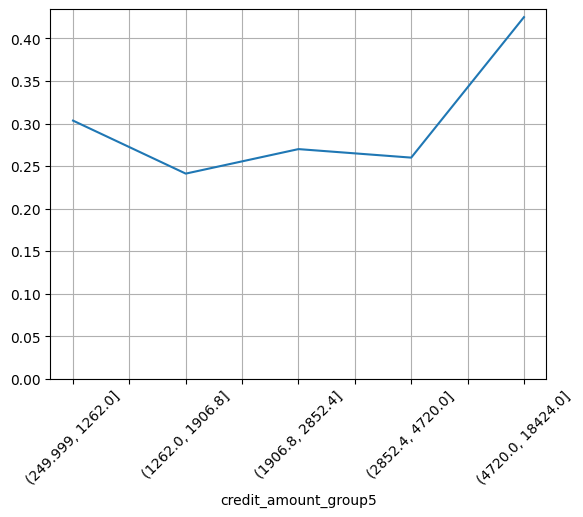

In [349]:
df.groupby('credit_amount_group5', observed=True)['default'].mean().plot(rot=45,ylim=0,grid=True)

# Распределение

## Категориальные (value_counts)

In [350]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,credit_amount_group,credit_amount_group2,credit_amount_group3,credit_amount_group4,credit_amount_group5
0,67,male,2,own,NaN,little,1169,6,radio/TV,0,"(231.826, 3884.8]","(249.999, 1262.0]","(1000.0, 2000.0]",1k+,"(249.999, 1262.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(3884.8, 7519.6]","(4720.0, 18424.0]","(5000.0, inf]",1k+,"(4720.0, 18424.0]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(231.826, 3884.8]","(1906.8, 2852.4]","(2000.0, 3000.0]",1k+,"(1906.8, 2852.4]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(7519.6, 11154.4]","(4720.0, 18424.0]","(5000.0, inf]",1k+,"(4720.0, 18424.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(3884.8, 7519.6]","(4720.0, 18424.0]","(3000.0, 5000.0]",1k+,"(4720.0, 18424.0]"


In [351]:
df['checking_account'].value_counts()

,count
checking_account,
no_info,394
little,274
moderate,269
rich,63


In [352]:
df['checking_account'].value_counts(normalize=True)

,proportion
checking_account,
no_info,0.394
little,0.274
moderate,0.269
rich,0.063


In [353]:
df['default'].value_counts()

,count
default,
0,700
1,300


In [354]:
df['default'].value_counts(normalize=True)

,proportion
default,
0,0.7
1,0.3


In [355]:
df['default'].mean()

0.3

In [356]:
pd.get_dummies(df['checking_account'])

,little,moderate,no_info,rich
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
995,False,False,True,False
996,True,False,False,False
997,False,False,True,False
998,True,False,False,False


## Непрерывные (hist)

In [357]:
df['credit_amount'].value_counts()

,count
credit_amount,
1478,3
1262,3
1258,3
1275,3
1393,3
...,...
1459,1
882,1
3758,1


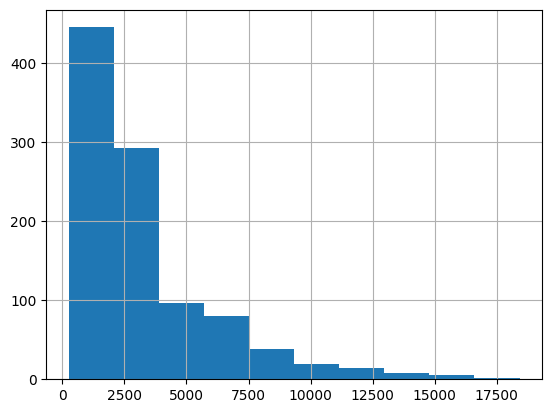

In [358]:
h = df['credit_amount'].hist()

In [359]:
def get_hist(ax):
    n,bins = [],[]
    for rect in ax.patches:
        ((x0, y0), (x1, y1)) = rect.get_bbox().get_points()
        n.append(y1-y0)
        bins.append(x0)
    bins.append(x1)
    return n,bins
n, bins = get_hist(h)

In [360]:
n

[445.0, 293.0, 97.0, 80.0, 38.0, 19.0, 14.0, 8.0, 5.0, 1.0]

In [361]:
bins

[249.9999999999999,
 2067.4,
 3884.7999999999997,
 5702.200000000001,
 7519.599999999999,
 9337.0,
 11154.400000000003,
 12971.800000000001,
 14789.2,
 16606.6,
 18424.0]

## Характеристики непрерывной переменной


In [362]:
df['credit_amount']

,credit_amount
0,1169
1,5951
2,2096
3,7882
4,4870
...,...
995,1736
996,3857
997,804
998,1845


<Axes: >

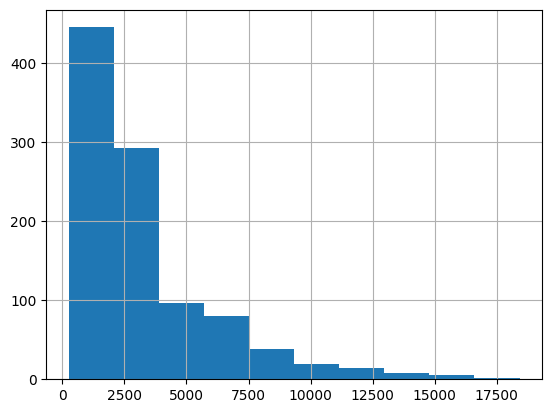

In [363]:
df['credit_amount'].hist()

In [364]:
df['credit_amount'].mean()

3271.258

In [365]:
t = pd.DataFrame({'salary':[20,30,20,40,50,40]})

In [366]:
t['salary'].mean()

33.333333333333336

In [367]:
t = pd.DataFrame({'salary':[20,30,20,40,50,40,10000000]})

In [368]:
t['salary'].mean()

1428600.0

In [369]:
t['salary'].median()

40.0

In [370]:
df['credit_amount'].agg(['mean','median'])

,credit_amount
mean,3271.258
median,2319.500


<Axes: >

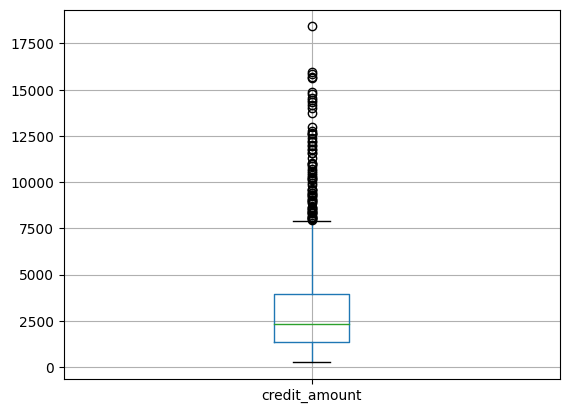

In [371]:
df.boxplot('credit_amount')

<Axes: title={'center': 'credit_amount'}, xlabel='checking_account'>

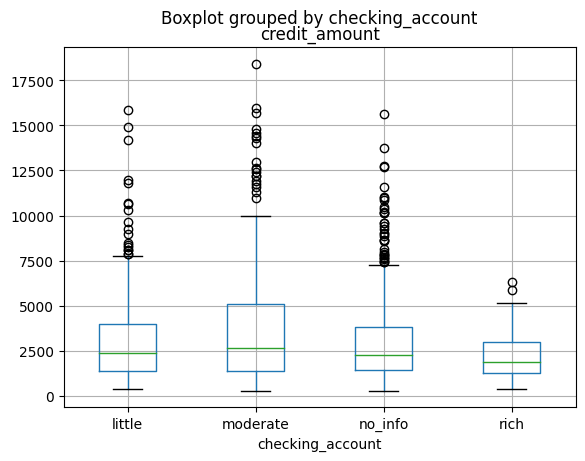

In [372]:
df.boxplot('credit_amount',by='checking_account')

In [373]:
df['credit_amount'].describe()

,credit_amount
count,1000.000000
mean,3271.258000
std,2822.736876
min,250.000000
25%,1365.500000
50%,2319.500000
75%,3972.250000
max,18424.000000


# Скаттер

## Скаттер плот

In [374]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,credit_amount_group,credit_amount_group2,credit_amount_group3,credit_amount_group4,credit_amount_group5
0,67,male,2,own,NaN,little,1169,6,radio/TV,0,"(231.826, 3884.8]","(249.999, 1262.0]","(1000.0, 2000.0]",1k+,"(249.999, 1262.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(3884.8, 7519.6]","(4720.0, 18424.0]","(5000.0, inf]",1k+,"(4720.0, 18424.0]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(231.826, 3884.8]","(1906.8, 2852.4]","(2000.0, 3000.0]",1k+,"(1906.8, 2852.4]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(7519.6, 11154.4]","(4720.0, 18424.0]","(5000.0, inf]",1k+,"(4720.0, 18424.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(3884.8, 7519.6]","(4720.0, 18424.0]","(3000.0, 5000.0]",1k+,"(4720.0, 18424.0]"


<Axes: xlabel='age', ylabel='credit_amount'>

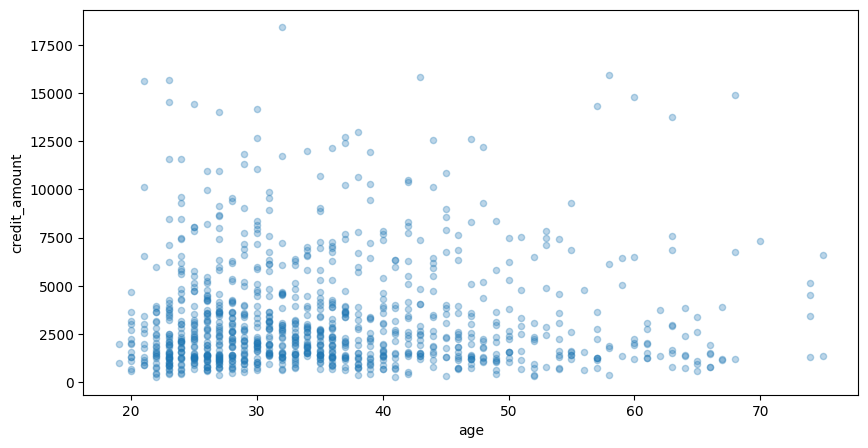

In [375]:
df.plot(x='age',y='credit_amount',kind='scatter',figsize=(10,5),alpha=0.3)

In [376]:
df['age_group'] = pd.qcut(df['age'],5)

In [377]:
df.groupby('age_group', observed=False)['credit_amount'].agg(['count','mean','median'])

,count,mean,median
age_group,,,
"(18.999, 26.0]",240,2987.645833,2112.5
"(26.0, 30.0]",171,3436.578947,2463.0
"(30.0, 36.0]",216,3240.439815,2427.0
"(36.0, 45.0]",187,3618.401070,2522.0
"(45.0, 75.0]",186,3172.000000,2064.0


<Axes: xlabel='age_group'>

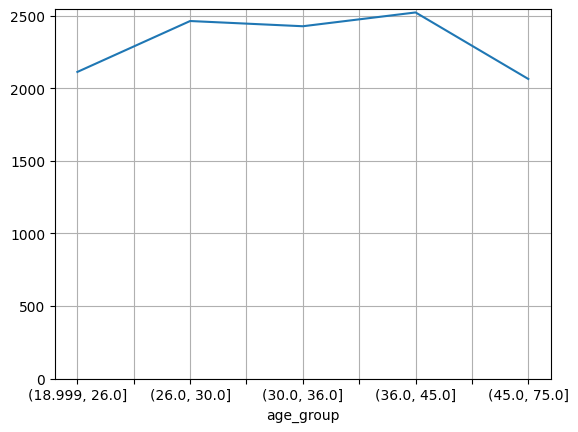

In [378]:
df.groupby('age_group', observed=True)['credit_amount'].median().plot(ylim=0,grid=True)

## Корреляция

In [379]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,credit_amount_group,credit_amount_group2,credit_amount_group3,credit_amount_group4,credit_amount_group5,age_group
0,67,male,2,own,NaN,little,1169,6,radio/TV,0,"(231.826, 3884.8]","(249.999, 1262.0]","(1000.0, 2000.0]",1k+,"(249.999, 1262.0]","(45.0, 75.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(3884.8, 7519.6]","(4720.0, 18424.0]","(5000.0, inf]",1k+,"(4720.0, 18424.0]","(18.999, 26.0]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(231.826, 3884.8]","(1906.8, 2852.4]","(2000.0, 3000.0]",1k+,"(1906.8, 2852.4]","(45.0, 75.0]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(7519.6, 11154.4]","(4720.0, 18424.0]","(5000.0, inf]",1k+,"(4720.0, 18424.0]","(36.0, 45.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(3884.8, 7519.6]","(4720.0, 18424.0]","(3000.0, 5000.0]",1k+,"(4720.0, 18424.0]","(45.0, 75.0]"


In [380]:
df[['age','credit_amount']].corr()

,age,credit_amount
age,1.000000,0.032716
credit_amount,0.032716,1.000000


In [381]:
t = pd.DataFrame({'x':range(10)})

In [382]:
t['y'] = t['x'] + 7

<Axes: xlabel='x', ylabel='y'>

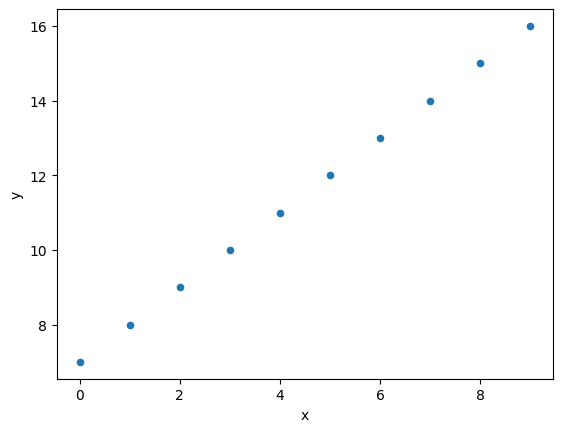

In [383]:
t.plot(x='x',y='y',kind='scatter')

In [384]:
t.corr()

,x,y
x,1.0,1.0
y,1.0,1.0


In [385]:
t['y'] = -t['x'] - 7

<Axes: xlabel='x', ylabel='y'>

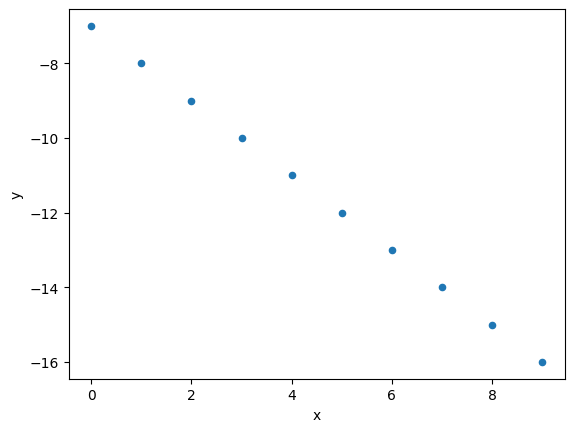

In [386]:
t.plot(x='x',y='y',kind='scatter')

In [387]:
t.corr()

,x,y
x,1.0,-1.0
y,-1.0,1.0


In [388]:
t = pd.DataFrame({'x':np.linspace(-10,10,100)})

In [389]:
t['y'] = t['x'] ** 2

<Axes: xlabel='x', ylabel='y'>

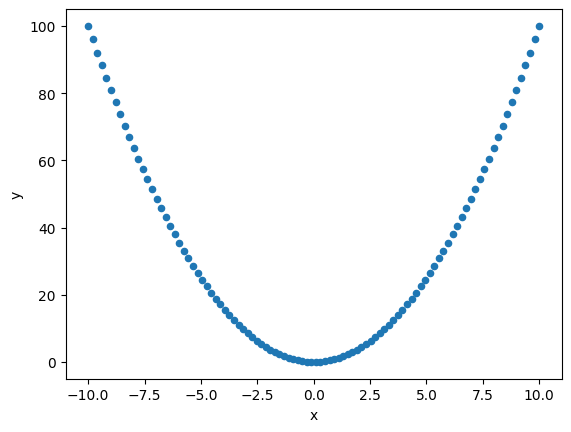

In [390]:
t.plot(x='x',y='y',kind='scatter')

In [391]:
t.corr()

,x,y
x,1.000000e+00,3.205184e-17
y,3.205184e-17,1.000000e+00


# Анализ

## Предобработка

Age (numeric)  
Sex (text: male, female)  
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)  
Housing (text: own, rent, or free)  
Saving accounts (text - little, moderate, quite rich, rich)  
Checking account (numeric, in DM - Deutsch Mark)  
Credit amount (numeric, in DM)  
Duration (numeric, in month)  
Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)  
default (1 - bad, 0 - good)


Задание: проанализировать от чего зависит default

In [392]:
df = pd.read_csv('/content/german-credit.csv')

In [393]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,1


In [394]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [395]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [396]:
df.isna().mean()

,0
age,0.000
sex,0.000
job,0.000
housing,0.000
saving_accounts,0.183
checking_account,0.394
credit_amount,0.000
duration,0.000
purpose,0.000
default,0.000


Техническая замена пропусков

In [422]:
df['saving_accounts'].fillna('no_info',inplace=True)

<ipython-input-422-1ce8fb9603c4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['saving_accounts'].fillna('no_info',inplace=True)


In [398]:
df['checking_account'].fillna('no_info',inplace=True)

<ipython-input-398-0aa3fd0c2191>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['checking_account'].fillna('no_info',inplace=True)


In [399]:
df.isna().mean()

,0
age,0.0
sex,0.0
job,0.0
housing,0.0
saving_accounts,0.0
checking_account,0.0
credit_amount,0.0
duration,0.0
purpose,0.0
default,0.0


## Анализ

In [400]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,no_info,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,no_info,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [401]:
df['age_group'] = pd.qcut(df['age'],5)

In [402]:
df.groupby('age_group', observed=False)['default'].agg(['count','mean'])

,count,mean
age_group,,
"(18.999, 26.0]",240,0.391667
"(26.0, 30.0]",171,0.315789
"(30.0, 36.0]",216,0.259259
"(36.0, 45.0]",187,0.262032
"(45.0, 75.0]",186,0.252688


<Axes: xlabel='age_group'>

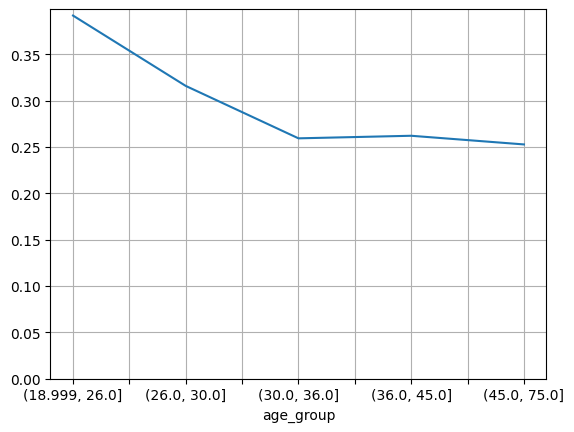

In [403]:
df.groupby('age_group', observed=True)['default'].mean().plot(ylim=0,grid=True)

С увеличением возраста процент дефолтников снижается

In [404]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group
0,67,male,2,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(45.0, 75.0]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(45.0, 75.0]"


In [405]:
df.groupby('sex')['default'].agg(['count','mean'])

,count,mean
sex,,
female,310,0.351613
male,690,0.276812


В выборке мужчин в 2 раза больше чем женщин. И среди женщин дефолта сильно больше. Возможно влияние переменной возраст

In [406]:
df.groupby('sex')['age'].agg(['count','mean','median'])

,count,mean,median
sex,,,
female,310,32.803226,29.0
male,690,36.778261,35.0


Женщины в этой выборке моложе. Посмотрим в разрезе пола и возраста

In [407]:
df['age_group2'] = pd.qcut(df['age'],3)

In [408]:
df.groupby(['age_group2','sex'])['default'].agg(['count','mean'])

<ipython-input-408-588dec13e146>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group2','sex'])['default'].agg(['count','mean'])


count      mean
age_group2     sex                    
(18.999, 28.0] female    154  0.409091
               male      180  0.327778
(28.0, 38.0]   female     83  0.385542
               male      263  0.235741
(38.0, 75.0]   female     73  0.191781
               male      247  0.283401

В молодом и среднем возрасте женщины хуже возвращают долги, а в более старшем, наоборот, женщины возвращают долги лучше, чем мужчины.


In [409]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group,age_group2
0,67,male,2,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]","(38.0, 75.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]","(18.999, 28.0]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(45.0, 75.0]","(38.0, 75.0]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]","(38.0, 75.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(45.0, 75.0]","(38.0, 75.0]"


0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled

In [410]:
job_dict = {0:"unskilled and non-resident",
            1:"unskilled and resident",
            2:"skilled",
            3: "highly skilled"}

In [411]:
job_dict

{0: 'unskilled and non-resident',
 1: 'unskilled and resident',
 2: 'skilled',
 3: 'highly skilled'}

In [412]:
df['job'] = df['job'].map(job_dict)

In [413]:
df.groupby('job')['default'].agg(['count','mean'])

,count,mean
job,,
highly skilled,148,0.344595
skilled,630,0.295238
unskilled and non-resident,22,0.318182
unskilled and resident,200,0.280000


Странно, что в skilled самый высокий дефолт. Возможно влияние другой перменной

In [414]:
df.groupby(['job','age_group2'])['default'].agg(['count','mean'])

<ipython-input-414-452092ed37c1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['job','age_group2'])['default'].agg(['count','mean'])


count      mean
job                        age_group2                     
highly skilled             (18.999, 28.0]     21  0.523810
                           (28.0, 38.0]       68  0.220588
                           (38.0, 75.0]       59  0.423729
skilled                    (18.999, 28.0]    240  0.350000
                           (28.0, 38.0]      220  0.268182
                           (38.0, 75.0]      170  0.252941
unskilled and non-resident (18.999, 28.0]      9  0.555556
                           (28.0, 38.0]        4  0.250000
                           (38.0, 75.0]        9  0.111111
unskilled and resident     (18.999, 28.0]     64  0.343750
                           (28.0, 38.0]       54  0.351852
                           (38.0, 75.0]       82  0.182927

В skilled много молодых и это влияет на уровень дефолта

In [415]:
df.groupby('job')['credit_amount'].agg(['count','mean','median'])

,count,mean,median
job,,,
highly skilled,148,5435.493243,4459.0
skilled,630,3070.965079,2324.0
unskilled and non-resident,22,2745.136364,1416.0
unskilled and resident,200,2358.520000,1622.0


Похоже, что главное влияние оказывает размер кредита. В hs и s размер кредита выше чем в unskilled. Проверим влияние размера кредита на дефолт

In [416]:
df['credit_amount_group'] = pd.qcut(df['credit_amount'],5)

In [417]:
df.groupby('credit_amount_group', observed=True)['default'].agg(['count','mean'])

,count,mean
credit_amount_group,,
"(249.999, 1262.0]",201,0.303483
"(1262.0, 1906.8]",199,0.241206
"(1906.8, 2852.4]",200,0.270000
"(2852.4, 4720.0]",200,0.260000
"(4720.0, 18424.0]",200,0.425000


Чем больше кредит, тем выше дефолт

In [418]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group,age_group2,credit_amount_group
0,67,male,skilled,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]","(38.0, 75.0]","(249.999, 1262.0]"
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]","(18.999, 28.0]","(4720.0, 18424.0]"
2,49,male,unskilled and resident,own,little,no_info,2096,12,education,0,"(45.0, 75.0]","(38.0, 75.0]","(1906.8, 2852.4]"
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]","(38.0, 75.0]","(4720.0, 18424.0]"
4,53,male,skilled,free,little,little,4870,24,car,1,"(45.0, 75.0]","(38.0, 75.0]","(4720.0, 18424.0]"


In [419]:
df.groupby('housing')['default'].agg(['count','mean'])

,count,mean
housing,,
free,108,0.407407
own,713,0.260870
rent,179,0.391061


Если дом в собственности, то дефолт гораздо ниже.

In [420]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group,age_group2,credit_amount_group
0,67,male,skilled,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]","(38.0, 75.0]","(249.999, 1262.0]"
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]","(18.999, 28.0]","(4720.0, 18424.0]"
2,49,male,unskilled and resident,own,little,no_info,2096,12,education,0,"(45.0, 75.0]","(38.0, 75.0]","(1906.8, 2852.4]"
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]","(38.0, 75.0]","(4720.0, 18424.0]"
4,53,male,skilled,free,little,little,4870,24,car,1,"(45.0, 75.0]","(38.0, 75.0]","(4720.0, 18424.0]"
